Chess Dataset Predictions:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

----------------------------------------------------------------------------------------------------------------------

First DataFrame:

----------------------------------------------------------------------------------------------------------------------

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [5]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


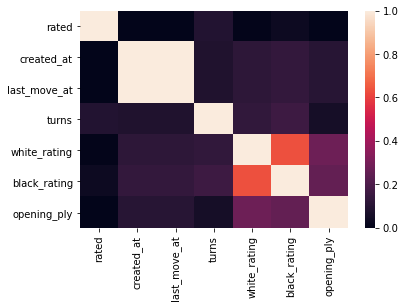

In [6]:
sns.heatmap(df.corr())

Very little correlation between anything of note, although the black rating and white rating have some correlation. We will want to look closer at that later.

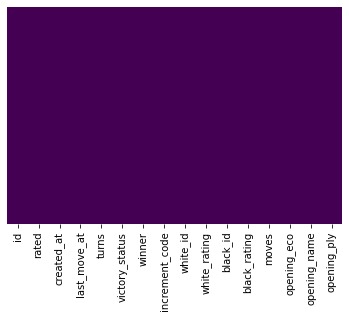

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No null values, which means we won't have to clean up any missing data.

In [8]:
df.drop('id', axis=1, inplace=True)
df.drop('white_id', axis=1, inplace=True)
df.drop('black_id', axis=1, inplace=True)
df.drop('created_at', axis=1, inplace=True)
df.drop('last_move_at', axis=1, inplace=True)
df.drop('victory_status',axis=1,inplace=True)
df.drop('moves',axis=1,inplace=True)

In [9]:
df.head()

,rated,turns,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_ply
0,False,13,white,15+2,1500,1191,D10,Slav Defense: Exchange Variation,5
1,True,16,black,5+10,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,61,white,5+10,1496,1500,C20,King's Pawn Game: Leonardis Variation,3
3,True,61,white,20+0,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,95,white,30+3,1523,1469,C41,Philidor Defense,5


In [10]:
rated = pd.get_dummies(df['rated'],drop_first=True)
opening_eco = pd.get_dummies(df['opening_eco'],drop_first=True)
opening_name = pd.get_dummies(df['opening_name'],drop_first=True)
increment_code = pd.get_dummies(df['increment_code'],drop_first=True)

In [11]:
df.drop(['rated','opening_eco','opening_name','increment_code'],axis=1,inplace=True)

In [12]:
df = pd.concat([df, rated, opening_eco, opening_name],axis=1)
winner = {'white': 0, 'black': 1, 'draw': 2}
df['winner'] = [winner[item] for item in df['winner']]

In [13]:
df.head()

,turns,winner,white_rating,black_rating,opening_ply,True,A01,A02,A03,A04,...,Zukertort Opening: Quiet System,Zukertort Opening: Reversed Mexican Defense,Zukertort Opening: Ross Gambit,Zukertort Opening: Santasiere's Folly,Zukertort Opening: Sicilian Invitation,Zukertort Opening: Slav Invitation,Zukertort Opening: Tennison Gambit,Zukertort Opening: The Walrus,Zukertort Opening: Vos Gambit,Zukertort Opening: Wade Defense
0,13,0,1500,1191,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,1,1322,1261,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,61,0,1496,1500,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,61,0,1439,1454,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,95,0,1523,1469,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can finally see that everything is numerical and the dummy variables have been added, bringing the column size up quite a bit.

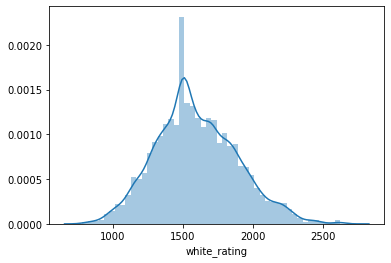

In [14]:
sns.distplot(df['white_rating'])

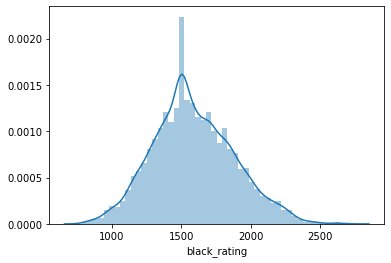

In [15]:
sns.distplot(df['black_rating'])

The average ratings between the player who chooses black and the player who chooses white are fairly similar. This means that rating will likely not affect the prediction very much, unless there are any particularly mismatched games.

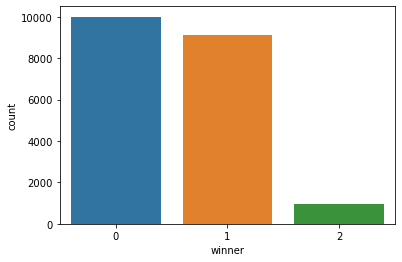

In [16]:
sns.countplot('winner', data=df)

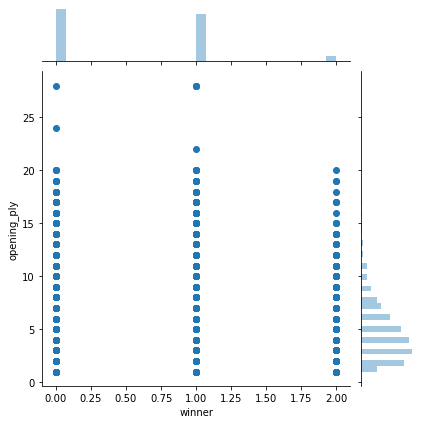

In [17]:
sns.jointplot(x='winner',y='opening_ply',data=df)

It's not super pretty, but this jointplot is useful to see that the average number of opening play moves is very low, and there are very few draws. There also does not seem to be any correlation between how many moves are in the opening play and whether or not black or white wins, as each column of dots looks very similar.

LOGISTIC REGRESSION ROUND 1:

In [18]:
from sklearn.model_selection import train_test_split
y = df['winner']
X = df.drop('winner', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
predictions = logmodel.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67      3025
           1       0.61      0.59      0.60      2719
           2       1.00      0.01      0.02       274

    accuracy                           0.62      6018
   macro avg       0.75      0.44      0.43      6018
weighted avg       0.64      0.62      0.61      6018

[[2152  873    0]
 [1113 1606    0]
 [ 127  144    3]]


An f1-score of 61% is pretty bad. The data must not have enough information at this stage to be super helpful, but we will put it through another metric or two to make sure.

______________________________________________________________________________________________________________________

KNN ROUND 1:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('winner', axis = 1))
scaled_features = scaler.transform(df.drop('winner', axis = 1))
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_feat.head()

X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['winner'], test_size=0.30, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

Choosing a K value:

error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='lightblue', linestyle='solid', marker='*', 
         markerfacecolor='orange', markersize=5)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

I could not get the above code to run on my computer, so I scratched KNN. It loaded for over an hour and still would not give me a graph of the error rate for me to pick a better k value.

______________________________________________________________________________________________________________________

RANDOM FORESTS ROUND 1:

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [24]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.65      0.64      3025
           1       0.60      0.59      0.59      2719
           2       0.21      0.15      0.18       274

    accuracy                           0.60      6018
   macro avg       0.48      0.47      0.47      6018
weighted avg       0.60      0.60      0.60      6018

[[1972  975   78]
 [1021 1615   83]
 [ 110  122   42]]


As expected, a single tree's performance is abysmal. Let's try a forest next.

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68      3025
           1       0.63      0.61      0.62      2719
           2       0.54      0.09      0.16       274

    accuracy                           0.64      6018
   macro avg       0.61      0.47      0.48      6018
weighted avg       0.63      0.64      0.63      6018

[[2165  850   10]
 [1063 1645   11]
 [ 119  130   25]]


As we can see, the f1-score remains rather low. Let's clean up the data in a new dataset and add back in the victory status to see if that helps.

----------------------------------------------------------------------------------------------------------------------

Second DataFrame:

----------------------------------------------------------------------------------------------------------------------

In [28]:
df2 = pd.read_csv('games.csv')

In [29]:
df2.drop('id', axis=1, inplace=True)
df2.drop('white_id', axis=1, inplace=True)
df2.drop('black_id', axis=1, inplace=True)
df2.drop('created_at', axis=1, inplace=True)
df2.drop('last_move_at', axis=1, inplace=True)
df2.drop('moves',axis=1,inplace=True)

In [30]:
df2.drop(['rated','opening_eco','opening_name','increment_code'],axis=1,inplace=True)

In [31]:
df2 = pd.concat([df2, rated, opening_eco, opening_name],axis=1)
winner = {'white': 0, 'black': 1, 'draw': 2}
df2['winner'] = [winner[item] for item in df2['winner']]

In [32]:
df2['victory_status'].unique()

array(['outoftime', 'resign', 'mate', 'draw'], dtype=object)

In [33]:
vic_stat = {'outoftime' : 0, 'resign' : 1, 'mate' : 2, 'draw' : 3}
df2['victory_status'] = [vic_stat[item] for item in df2['victory_status']]

In [34]:
df2.head()

,turns,victory_status,winner,white_rating,black_rating,opening_ply,True,A01,A02,A03,...,Zukertort Opening: Quiet System,Zukertort Opening: Reversed Mexican Defense,Zukertort Opening: Ross Gambit,Zukertort Opening: Santasiere's Folly,Zukertort Opening: Sicilian Invitation,Zukertort Opening: Slav Invitation,Zukertort Opening: Tennison Gambit,Zukertort Opening: The Walrus,Zukertort Opening: Vos Gambit,Zukertort Opening: Wade Defense
0,13,0,0,1500,1191,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,1,1,1322,1261,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,61,2,0,1496,1500,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,61,2,0,1439,1454,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,95,2,0,1523,1469,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


LOGISTIC REGRESSION ROUND 2:

In [35]:
y = df2['winner']
X = df2.drop('winner', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [36]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
predictions = logmodel.predict(X_test)

In [38]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.63      0.68      0.66      3025
           1       0.60      0.59      0.60      2719
           2       0.60      0.11      0.19       274

    accuracy                           0.62      6018
   macro avg       0.61      0.46      0.48      6018
weighted avg       0.62      0.62      0.61      6018

[[2070  938   17]
 [1100 1615    4]
 [ 122  121   31]]


It doesn't seem that the victory status helped all that much. 

______________________________________________________________________________________________________________________

RANDOM FORESTS ROUND 2:

In [39]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      3025
           1       0.65      0.62      0.63      2719
           2       1.00      0.95      0.97       274

    accuracy                           0.68      6018
   macro avg       0.78      0.76      0.77      6018
weighted avg       0.68      0.68      0.68      6018

[[2145  880    0]
 [1041 1678    0]
 [   5    9  260]]


With randomforests, however, we improve our f1-score by 6%. Definitely an increase, but not quite as high as we want it.

----------------------------------------------------------------------------------------------------------------------

Third DataFrame:

----------------------------------------------------------------------------------------------------------------------

In [41]:
df3 = pd.read_csv('games.csv')

In [42]:
df3.drop('id', axis=1, inplace=True)
df3.drop('white_id', axis=1, inplace=True)
df3.drop('black_id', axis=1, inplace=True)
df3.drop('created_at', axis=1, inplace=True)
df3.drop('last_move_at', axis=1, inplace=True)

In [43]:
df3.drop(['rated','opening_eco','opening_name','increment_code'],axis=1,inplace=True)

In [44]:
df3 = pd.concat([df3, rated, opening_eco, opening_name],axis=1)
winner = {'white': 0, 'black': 1, 'draw': 2}
df3['winner'] = [winner[item] for item in df3['winner']]
vic_stat = {'outoftime' : 0, 'resign' : 1, 'mate' : 2, 'draw' : 3}
df3['victory_status'] = [vic_stat[item] for item in df3['victory_status']]
df3.head()

,turns,victory_status,winner,white_rating,black_rating,moves,opening_ply,True,A01,A02,...,Zukertort Opening: Quiet System,Zukertort Opening: Reversed Mexican Defense,Zukertort Opening: Ross Gambit,Zukertort Opening: Santasiere's Folly,Zukertort Opening: Sicilian Invitation,Zukertort Opening: Slav Invitation,Zukertort Opening: Tennison Gambit,Zukertort Opening: The Walrus,Zukertort Opening: Vos Gambit,Zukertort Opening: Wade Defense
0,13,0,0,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,1,1,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,61,2,0,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,61,2,0,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,95,2,0,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,5,1,0,0,...,0,0,0,0,0,0,0,0,0,0


def function1(data):  
    moves = (items.split()[:5] for items in data)
    for x in data:
        x = moves[:1]
        moves = moves[1:]
    return data
df3['moves'] = df3[['moves']].apply(function1, axis = 1)

I wanted to change the data for the moves column into a list of the first five moves and then assign each of those a value, but I couldn't get the code to work properly, so let's try using dummy variables.

In [45]:
moves = pd.get_dummies(df3['moves'],drop_first=True)
df3.drop('moves', axis=1, inplace=True)
df3 = pd.concat([df3, moves], axis=1)

In [46]:
df3.head()

,turns,victory_status,winner,white_rating,black_rating,opening_ply,True,A01,A02,A03,...,h4 e5 d4 d6 dxe5 dxe5 e4 Qxd1+ Kxd1 Bg4+ Be2 Bxe2+ Nxe2 h5,h4 e5 e4 h5 f3 g6 g4 g5 hxg5 hxg4 fxg4 Qxg5 Rxh8 Nf6 Bh3 Nxe4 Ne2 Qh4+ Kf1 Qxh8 d4 Qxh3+ Ke1 Qh1+ Ng1 Qg2 c4 Qxg1+ Ke2 Ng3+ Kd2 Ne4+ Kd3 Qxd1+ Kxe4 Qxc1 a4 Qh1+ Kxe5 Bg7+ Kf5 d6+ Kg5 Nd7 c5 dxc5 dxc5 Nxc5 Kf4 Qf1+ Kg3 Be5+ Kh4 Bxg4 Kg5 Bxb2 Ra3 Bxa3 Kh6 Bc1+ Kg7 Ke7 Kh7 Bf5+ Kg7 Qg1#,h4 e5 g3 Bc5 Bh3 Qf6 Nf3 e4 O-O exf3 Qe1 fxe2 Qxe2+ Ne7 g4 b6 g5 Qc6 h5 Bb7 Rd1 Qh1#,h4 e5 g3 Bc5 f3 Qf6 Rh2 Qg6 h5 Qxg3+ Rf2 Qxf2#,h4 e5 g3 Nc6 Bh3 Nf6 b4 Bc5 bxc5 Nd4 c3 Ne6 Bxe6 dxe6 e4 Nxe4 Qa4+ Bd7 Qxe4,h4 e5 g3 d5 f4 Nc6 Bh3 f5 Bg2 e4 d3 Nf6 Qd2 Bb4 c3 Ba5 Qc2 O-O Qd1 d4 Qa4 dxc3 Qc2 cxb2+ Kd1 bxa1=Q Bb2 Nd4 Qc1 Qxa2 Na3 Qb3+ Qc2 Nxc2 Kc1 Nxa3 Bxa3 Qxa3+ Kb1 exd3 exd3 Qaxd3+ Kb2 Qd2+ Kb3,h4 e5 h5 d5 Rh3 f6 Nf3 c5 e4 dxe4 Qe2 Bf5 Qd3 g6 Qc4 exf3 Qxc5 Bxc5 d3 Bxh3 Be2 fxg2 f3 g1=Q+ Bf1 Qxf1+ Kd2 Qxf3 d4 Qxd4+ Ke1 Qc4 Kd2 Qfe2#,h4 e5 h5 d5 e3 Nf6 f3 e4 g4 exf3 g5 Bg4 Kf2 Ne4+ Ke1 Qd6 Nxf3 Qg3+ Ke2 Bxf3+ Kd3 Nf2+ Kc3 Nxd1+ Kb3 Bxh1 Be2 Qd6 a3 Qb6+ Ka2 Nf2 Nc3 Nh3 d4 Nxg5 Bd2 Be4 Na4 Qf6 Nc5 Bxc5 dxc5 Bxc2 Rf1 Qe6 Bb5+ c6 Be2 d4+ Ka1 dxe3 Bc3 O-O b3 Bxb3 Rb1 Bc2 Rxb7 Nd7,h4 e5 h5 h6 Nc3 Qf6 Nd5 Qc6 e4 Nf6 Qf3 d6 Bb5 Qxb5 Nxc7+ Kd7 Nxb5 Nc6 Ne2 a6 Nbc3 Nb4 Na4 Nxc2+ Kd1 Nxa1 Nb6+ Ke8 Nxa8 Bg4 Qd3 Kd7 Nb6+ Kd8 Nd5 Nxd5 exd5 Be7 Qb1 Bg5 Qxa1 Ke7 f3 Bf5 g4 Bd3 b3 Rc8 Ke1 Rc5 Nc3 Bf4 Ba3 Bg3+ Kd1 Ra5 Bb4 Rb5 Nxb5 axb5 Qc3 Bh7 Qc7+ Kf6 Qxd6+ Kg5 Qe7+ Kf4 Qxf7+ Kg5 Be7#,h4 e6 g3 d5 Bh3 c5 d3 Nc6 c3 Qb6 a3 Nh6 Bxh6 gxh6 Nf3 Be7 b4 cxb4 axb4 Bf6 Qa4 Bd7 Na3 Bxc3+ Kf1 Bxa1 b5 Ne5 Nxe5 Bxe5 Kg2 a6 Rb1 Ke7 Qb4+ Bd6 Qb3 Bxa3 Qxa3+ Ke8 f4 Bxb5 Rxb5 Qxb5 f5 Qc6 f6 Rg8 Qe7#
0,13,0,0,1500,1191,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,1,1,1322,1261,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,61,2,0,1496,1500,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,61,2,0,1439,1454,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,95,2,0,1523,1469,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


LOGISTIC REGRESSION ROUND 3:

In [47]:
y = df3['winner']
X = df3.drop('winner', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [48]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
predictions = logmodel.predict(X_test)

In [50]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.69      0.66      3025
           1       0.60      0.61      0.61      2719
           2       0.77      0.04      0.07       274

    accuracy                           0.62      6018
   macro avg       0.67      0.44      0.45      6018
weighted avg       0.63      0.62      0.61      6018

[[2076  946    3]
 [1065 1654    0]
 [ 124  140   10]]


Once again, very little improvement from the last dataset. However, the precision score did increase very slightly.

______________________________________________________________________________________________________________________

RANDOM FORESTS ROUND 3:

In [51]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70      3025
           1       0.67      0.58      0.62      2719
           2       1.00      0.95      0.97       274

    accuracy                           0.68      6018
   macro avg       0.78      0.76      0.76      6018
weighted avg       0.68      0.68      0.67      6018

[[2244  781    0]
 [1149 1570    0]
 [   5    9  260]]


The problem with the dummy variables for the moves is that very few games have the same moves, so it will factor very little into the overall score.

----------------------------------------------------------------------------------------------------------------------

FINAL METRIC TESTS:

----------------------------------------------------------------------------------------------------------------------

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0).fit(X_train, y_train)

In [55]:
predictions = GBC.predict(X_test)

In [56]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69      3025
           1       0.65      0.53      0.59      2719
           2       1.00      0.95      0.97       274

    accuracy                           0.66      6018
   macro avg       0.76      0.74      0.75      6018
weighted avg       0.66      0.66      0.66      6018

[[2262  763    0]
 [1271 1448    0]
 [   9    5  260]]


Gradient boosting works worse than randomforests.

______________________________________________________________________________________________________________________

CONCLUSION:

The randomforests metric works best on this dataset while using the second or third dataframe. Predicting chess games is extremely tricky because of the crazy amount of move combinations possible in a game, but using the opening moves as a key we can get nearly seventy percent accuracy. 